In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from pprint import pprint

In [2]:
client = MongoClient(os.environ["ECOMMERCE__CONNECTION_STRING"])
db = client["ecommerce"]
serverStatusResult = db.command("serverStatus")
pprint(serverStatusResult)

{'$clusterTime': {'clusterTime': Timestamp(1733179267, 4),
                  'signature': {'hash': b'\x1e?\x8e{^\x1f%3\x02\xcaj\xd3'
                                        b'\x9d%\x9b\xf4a\xf2dR',
                                'keyId': 7389295562647928840}},
 'asserts': {'msg': 0, 'regular': 0, 'rollovers': 0, 'user': 0, 'warning': 0},
 'atlasVersion': {'gitVersion': '187c4553b9ee076e86218fd2076914ae11ecc113',
                  'version': '20241113.0.0.1731341512'},
 'connections': {'available': 475, 'current': 25, 'totalCreated': 283},
 'extra_info': {'note': 'fields vary by platform', 'page_faults': 0},
 'host': 'cluster0-shard-00-02.zf6aq.mongodb.net:27017',
 'localTime': datetime.datetime(2024, 12, 2, 22, 41, 7, 219000),
 'mem': {'bits': 64,
         'mapped': 0,
         'mappedWithJournal': 0,
         'resident': 0,
         'supported': True,
         'virtual': 0},
 'metrics': {'aggStageCounters': {'search': 0,
                                  'searchBeta': 0,
            

# Amazon Sale Report

## Data Wrangling and Cleaning

In [3]:
sales_report = db['Amazon-Sale-Report'].find() 
df = pd.DataFrame(list(sales_report))

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   _id                 128976 non-null  object 
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Style               128976 non-null  object 
 8   SKU                 128976 non-null  object 
 9   Category            128976 non-null  object 
 10  Size                128976 non-null  object 
 11  ASIN                128976 non-null  object 
 12  Qty                 128976 non-null  int64  
 13  currency            121181 non-null  object 
 14  Amount              121181 non-null  float64
 15  ship-city           128943 non-nul

In [5]:
df.head()

,_id,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,Courier Status,promotion-ids,Unnamed: 22
0,672d2bca5b46a7edd82d2a72,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN,NaN
1,672d2bca5b46a7edd82d2a73,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,Shipped,Amazon PLCC Free-Financing Universal Merchant ...,NaN
2,672d2bca5b46a7edd82d2a74,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108,NaN
3,672d2bca5b46a7edd82d2a75,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN,NaN
4,672d2bca5b46a7edd82d2a76,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,Shipped,NaN,NaN


In [6]:
missing_values = df.isnull().sum()
print(missing_values)

_id                       0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
B2B                       0
fulfilled-by          89698
Courier Status         6872
promotion-ids         49153
Unnamed: 22           49051
dtype: int64


In [7]:
df.head()

,_id,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,Courier Status,promotion-ids,Unnamed: 22
0,672d2bca5b46a7edd82d2a72,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN,NaN
1,672d2bca5b46a7edd82d2a73,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,Shipped,Amazon PLCC Free-Financing Universal Merchant ...,NaN
2,672d2bca5b46a7edd82d2a74,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108,NaN
3,672d2bca5b46a7edd82d2a75,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN,NaN
4,672d2bca5b46a7edd82d2a76,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,Shipped,NaN,NaN


In [8]:
# Drop "Unnamed: 22" column
df.drop("Unnamed: 22", axis=1, inplace=True)
df.head()

,_id,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,Courier Status,promotion-ids
0,672d2bca5b46a7edd82d2a72,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,672d2bca5b46a7edd82d2a73,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,Shipped,Amazon PLCC Free-Financing Universal Merchant ...
2,672d2bca5b46a7edd82d2a74,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
3,672d2bca5b46a7edd82d2a75,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,672d2bca5b46a7edd82d2a76,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,Shipped,NaN


In [9]:
# unique values in "fulfilled-by" column
df["fulfilled-by"].unique()

array(['Easy Ship', nan], dtype=object)

In [10]:
# Drop "fulfilled-by" column
df.drop("fulfilled-by", axis=1, inplace=True)
df.head()

,_id,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Courier Status,promotion-ids
0,672d2bca5b46a7edd82d2a72,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,NaN,NaN
1,672d2bca5b46a7edd82d2a73,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Shipped,Amazon PLCC Free-Financing Universal Merchant ...
2,672d2bca5b46a7edd82d2a74,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
3,672d2bca5b46a7edd82d2a75,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,NaN,NaN
4,672d2bca5b46a7edd82d2a76,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Shipped,NaN


In [11]:
# Fill missing values in "promotion-ids" column with "None"
df["promotion-ids"].fillna("None", inplace=True)
df["promotion-ids"].head()

0                                                 None
1    Amazon PLCC Free-Financing Universal Merchant ...
2         IN Core Free Shipping 2015/04/08 23-48-5-108
3                                                 None
4                                                 None
Name: promotion-ids, dtype: object

In [12]:
shipping_info = df.loc[:, ["ship-city", "ship-state", "ship-postal-code", "ship-country"]]
df[shipping_info.isnull().any(axis=1)]

,_id,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Courier Status,promotion-ids
1871,672d2bcb5b46a7edd82d31c1,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,...,1,INR,493.0,NaN,NaN,NaN,NaN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
1872,672d2bcb5b46a7edd82d31c2,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,...,1,INR,458.0,NaN,NaN,NaN,NaN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
8752,672d2bd05b46a7edd82d4ca2,406-4003386-8768363,04-25-22,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-M,kurta,...,1,INR,432.0,NaN,NaN,NaN,NaN,False,Shipped,None
11215,672d2bd15b46a7edd82d5641,402-0107720-7057168,04-23-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,1,INR,654.0,NaN,NaN,NaN,NaN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
13252,672d2bd25b46a7edd82d5e36,407-4532637-8415521,04-22-22,Cancelled,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,0,INR,380.0,NaN,NaN,NaN,NaN,False,NaN,None
15688,672d2bd45b46a7edd82d67ba,404-9229894-8608305,04-21-22,Shipped,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,...,1,INR,442.0,NaN,NaN,NaN,NaN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
16787,672d2bd45b46a7edd82d6c05,402-4919636-4333150,04-20-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,...,1,INR,376.0,NaN,NaN,NaN,NaN,False,Shipped,Amazon PLCC Free-Financing Universal Merchant ...
18351,672d2bd55b46a7edd82d7221,405-4927647-8064368,04-19-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-XS,Set,...,1,INR,1112.0,NaN,NaN,NaN,NaN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
22930,672d2bd85b46a7edd82d8404,402-8628677-0457954,04-16-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,J0003,J0003-SET-S,Set,...,1,INR,654.0,NaN,NaN,NaN,NaN,False,Shipped,Amazon PLCC Free-Financing Universal Merchant ...
24986,672d2bd95b46a7edd82d8c0c,406-4079063-8291520,04-15-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3567,JNE3567-KR-XXL,kurta,...,1,INR,399.0,NaN,NaN,NaN,NaN,False,Unshipped,None


In [13]:
# Filling missing values in "ship-city" with next available value
df["ship-city"].ffill(inplace=True)
df[shipping_info.isnull().any(axis=1)]

,_id,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Courier Status,promotion-ids
1871,672d2bcb5b46a7edd82d31c1,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,...,1,INR,493.0,NEW DELHI,NaN,NaN,NaN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
1872,672d2bcb5b46a7edd82d31c2,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,...,1,INR,458.0,NEW DELHI,NaN,NaN,NaN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
8752,672d2bd05b46a7edd82d4ca2,406-4003386-8768363,04-25-22,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-M,kurta,...,1,INR,432.0,Mysuru,NaN,NaN,NaN,False,Shipped,None
11215,672d2bd15b46a7edd82d5641,402-0107720-7057168,04-23-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,1,INR,654.0,Junnar,NaN,NaN,NaN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
13252,672d2bd25b46a7edd82d5e36,407-4532637-8415521,04-22-22,Cancelled,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,0,INR,380.0,GORAKHPUR,NaN,NaN,NaN,False,NaN,None
15688,672d2bd45b46a7edd82d67ba,404-9229894-8608305,04-21-22,Shipped,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,...,1,INR,442.0,BENGALURU,NaN,NaN,NaN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
16787,672d2bd45b46a7edd82d6c05,402-4919636-4333150,04-20-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,...,1,INR,376.0,"Mudichur,chennai",NaN,NaN,NaN,False,Shipped,Amazon PLCC Free-Financing Universal Merchant ...
18351,672d2bd55b46a7edd82d7221,405-4927647-8064368,04-19-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-XS,Set,...,1,INR,1112.0,HYDERABAD,NaN,NaN,NaN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
22930,672d2bd85b46a7edd82d8404,402-8628677-0457954,04-16-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,J0003,J0003-SET-S,Set,...,1,INR,654.0,HYDERABAD,NaN,NaN,NaN,False,Shipped,Amazon PLCC Free-Financing Universal Merchant ...
24986,672d2bd95b46a7edd82d8c0c,406-4079063-8291520,04-15-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3567,JNE3567-KR-XXL,kurta,...,1,INR,399.0,CHENNAI,NaN,NaN,NaN,False,Unshipped,None


In [14]:
# Filling missing values in "ship-state" with next available value
df["ship-state"].ffill(inplace=True)
df[shipping_info.isnull().any(axis=1)]

,_id,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Courier Status,promotion-ids
1871,672d2bcb5b46a7edd82d31c1,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,...,1,INR,493.0,NEW DELHI,DELHI,NaN,NaN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
1872,672d2bcb5b46a7edd82d31c2,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,...,1,INR,458.0,NEW DELHI,DELHI,NaN,NaN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
8752,672d2bd05b46a7edd82d4ca2,406-4003386-8768363,04-25-22,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-M,kurta,...,1,INR,432.0,Mysuru,KARNATAKA,NaN,NaN,False,Shipped,None
11215,672d2bd15b46a7edd82d5641,402-0107720-7057168,04-23-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,1,INR,654.0,Junnar,MAHARASHTRA,NaN,NaN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
13252,672d2bd25b46a7edd82d5e36,407-4532637-8415521,04-22-22,Cancelled,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,0,INR,380.0,GORAKHPUR,UTTAR PRADESH,NaN,NaN,False,NaN,None
15688,672d2bd45b46a7edd82d67ba,404-9229894-8608305,04-21-22,Shipped,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,...,1,INR,442.0,BENGALURU,KARNATAKA,NaN,NaN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
16787,672d2bd45b46a7edd82d6c05,402-4919636-4333150,04-20-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,...,1,INR,376.0,"Mudichur,chennai",TAMIL NADU,NaN,NaN,False,Shipped,Amazon PLCC Free-Financing Universal Merchant ...
18351,672d2bd55b46a7edd82d7221,405-4927647-8064368,04-19-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-XS,Set,...,1,INR,1112.0,HYDERABAD,TELANGANA,NaN,NaN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
22930,672d2bd85b46a7edd82d8404,402-8628677-0457954,04-16-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,J0003,J0003-SET-S,Set,...,1,INR,654.0,HYDERABAD,TELANGANA,NaN,NaN,False,Shipped,Amazon PLCC Free-Financing Universal Merchant ...
24986,672d2bd95b46a7edd82d8c0c,406-4079063-8291520,04-15-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3567,JNE3567-KR-XXL,kurta,...,1,INR,399.0,CHENNAI,TAMIL NADU,NaN,NaN,False,Unshipped,None


In [15]:
# Filling missing values in "ship-postal-code" with next available value
df["ship-postal-code"].bfill(inplace=True)
df[shipping_info.isnull().any(axis=1)]

# Filling missing values in "ship-country" with "IN"
df["ship-country"].fillna("IN", inplace=True)
df[shipping_info.isnull().any(axis=1)]

,_id,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Courier Status,promotion-ids
1871,672d2bcb5b46a7edd82d31c1,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,...,1,INR,493.0,NEW DELHI,DELHI,400601.0,IN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
1872,672d2bcb5b46a7edd82d31c2,404-0566904-4825137,04-29-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-L,kurta,...,1,INR,458.0,NEW DELHI,DELHI,400601.0,IN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
8752,672d2bd05b46a7edd82d4ca2,406-4003386-8768363,04-25-22,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-M,kurta,...,1,INR,432.0,Mysuru,KARNATAKA,734426.0,IN,False,Shipped,None
11215,672d2bd15b46a7edd82d5641,402-0107720-7057168,04-23-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,1,INR,654.0,Junnar,MAHARASHTRA,401107.0,IN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
13252,672d2bd25b46a7edd82d5e36,407-4532637-8415521,04-22-22,Cancelled,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,0,INR,380.0,GORAKHPUR,UTTAR PRADESH,560064.0,IN,False,NaN,None
15688,672d2bd45b46a7edd82d67ba,404-9229894-8608305,04-21-22,Shipped,Amazon,Amazon.in,Expedited,JNE3510,JNE3510-KR-M,kurta,...,1,INR,442.0,BENGALURU,KARNATAKA,500068.0,IN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
16787,672d2bd45b46a7edd82d6c05,402-4919636-4333150,04-20-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE1233,JNE1233-BLUE-KR-031-XXXL,kurta,...,1,INR,376.0,"Mudichur,chennai",TAMIL NADU,110009.0,IN,False,Shipped,Amazon PLCC Free-Financing Universal Merchant ...
18351,672d2bd55b46a7edd82d7221,405-4927647-8064368,04-19-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-XS,Set,...,1,INR,1112.0,HYDERABAD,TELANGANA,500018.0,IN,False,Shipped,IN Core Free Shipping 2015/04/08 23-48-5-108
22930,672d2bd85b46a7edd82d8404,402-8628677-0457954,04-16-22,Shipped - Returned to Seller,Merchant,Amazon.in,Standard,J0003,J0003-SET-S,Set,...,1,INR,654.0,HYDERABAD,TELANGANA,423501.0,IN,False,Shipped,Amazon PLCC Free-Financing Universal Merchant ...
24986,672d2bd95b46a7edd82d8c0c,406-4079063-8291520,04-15-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3567,JNE3567-KR-XXL,kurta,...,1,INR,399.0,CHENNAI,TAMIL NADU,682306.0,IN,False,Unshipped,None


In [16]:
# Fill missing values in "Courier Status" column with "Unshipped"
df["Courier Status"].fillna("Unshipped", inplace=True)
# Change "Cancelled" to "Unshipped" in "Courier Status" column
df["Courier Status"].replace("Cancelled", "Unshipped", inplace=True)
df["Courier Status"].unique()

array(['Unshipped', 'Shipped'], dtype=object)

In [17]:
# Set missing values in "currency" to "INR" if "ship-country" is 'IN'
df["currency"].fillna("INR", inplace=True)
df["currency"].unique()

array(['INR'], dtype=object)

In [18]:
# Fill missing values in "Amount" using mean() and grouping by "Category"
df["Amount"].fillna(df.groupby("Category")["Amount"].transform("mean"), inplace=True)

## EDA

In [19]:
# Calculate summary statistics for Qty and Amount columns
df[["Qty", "Amount"]].describe()

,Qty,Amount
count,128976.000000,128976.000000
mean,0.904432,648.716177
std,0.313352,276.089067
min,0.000000,0.000000
25%,1.000000,455.926039
50%,1.000000,612.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


In [20]:
print("Median of Qty:", df["Qty"].median())
print("Median of Amount:", df["Amount"].median())

Median of Qty: 1.0
Median of Amount: 612.0


In [21]:
# Sort df by date
df = df.sort_values(by="Date")
# Convert "Date" column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

/tmp/ipykernel_128/3425094268.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


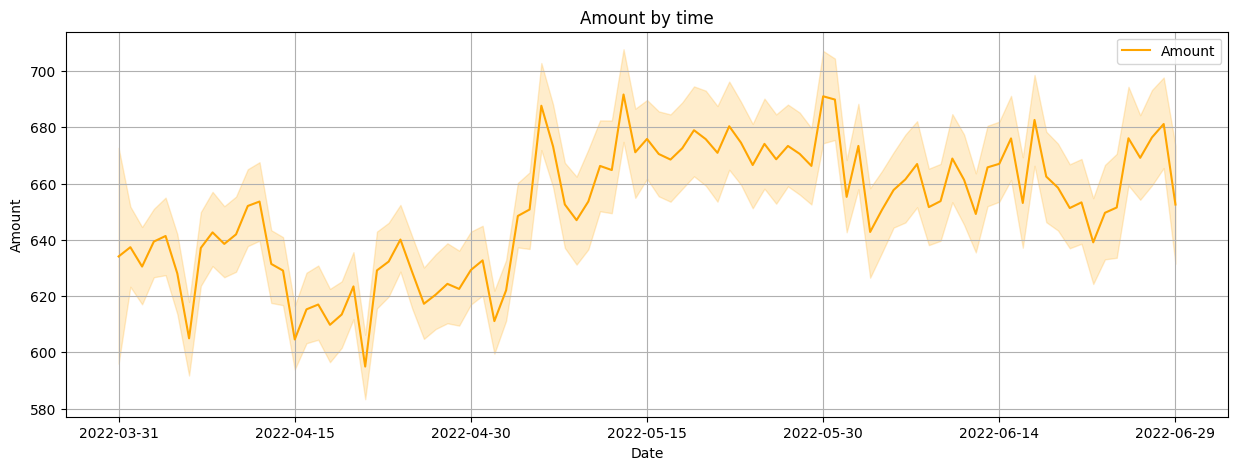

In [22]:
# Visualize Amount in a line plot
plt.figure(figsize=(15, 5))
sns.lineplot(x="Date", y="Amount", data=df, label="Amount", color="orange")
plt.title("Amount by time")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.xticks(pd.date_range(start=df["Date"].min(), end=df["Date"].max(), freq="15D"))
plt.grid(True)
plt.show()

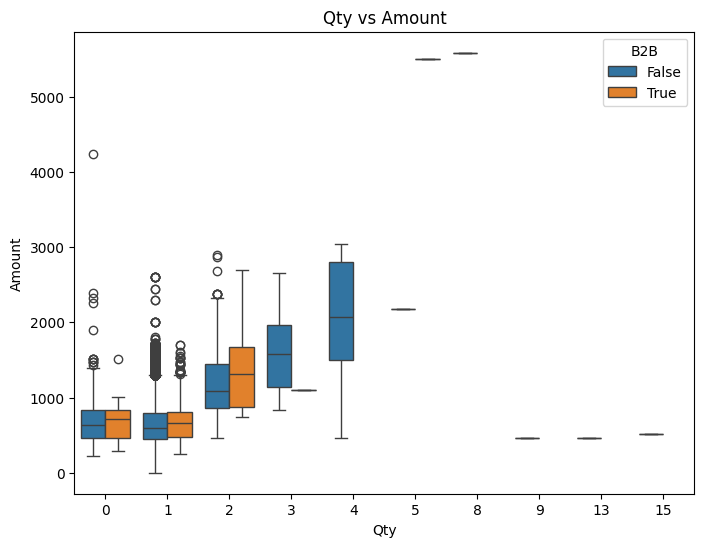

In [23]:
# Visualize "Qty" vs "Amount" in a box plot with "B2B" as the hue
plt.figure(figsize=(8, 6))
sns.boxplot(x="Qty", y="Amount", data=df, hue="B2B")
plt.title("Qty vs Amount")
plt.xlabel("Qty")
plt.ylabel("Amount")
plt.legend(title="B2B")
plt.show()

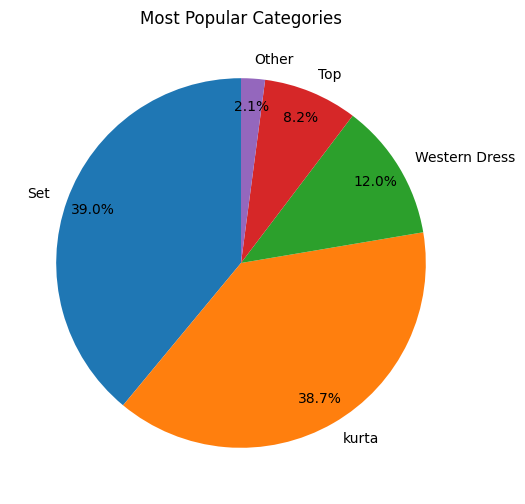

In [24]:
# Group small categories into "Other"
threshold = 0.01 * len(df)  # Define the threshold as 1% of the total
category_counts = df["Category"].value_counts()
filtered_categories = category_counts[category_counts >= threshold]
small_categories = category_counts[category_counts < threshold].sum()

# Create a new Series with "Other" category
category_counts_cleaned = pd.concat([filtered_categories, pd.Series({"Other": small_categories})])

# Plot the pie chart
plt.figure(figsize=(8, 6))
explode = [0.05 if i < len(category_counts_cleaned) - 1 else 0 for i in range(len(category_counts_cleaned))]
category_counts_cleaned.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labeldistance=1.1,
    pctdistance=0.85,
    textprops={'fontsize': 10}
)

plt.title("Most Popular Categories")
plt.ylabel("")  # Remove y-axis label
plt.show()

# International Sale Report

## Data Cleaning

In [25]:
int_sales_report = db['International-Sale-Report'].find() 
df2 = pd.DataFrame(list(int_sales_report))
df2.head()

,_id,index,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
0,672d28fe5b46a7edd82c97e1,0,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.00,616.56,617.00
1,672d28fe5b46a7edd82c97e2,1,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.00,616.56,617.00
2,672d28fe5b46a7edd82c97e3,2,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.00,616.56,617.00
3,672d28fe5b46a7edd82c97e4,3,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.00,616.56,617.00
4,672d28fe5b46a7edd82c97e5,4,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.00,12345.67,20000


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37432 entries, 0 to 37431
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   _id        37432 non-null  object
 1   index      37432 non-null  int64 
 2   DATE       37431 non-null  object
 3   Months     37407 non-null  object
 4   CUSTOMER   36392 non-null  object
 5   Style      36392 non-null  object
 6   SKU        34958 non-null  object
 7   Size       36392 non-null  object
 8   PCS        36392 non-null  object
 9   RATE       36424 non-null  object
 10  GROSS AMT  36424 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


In [27]:
df2.head()

,_id,index,DATE,Months,CUSTOMER,Style,SKU,Size,PCS,RATE,GROSS AMT
0,672d28fe5b46a7edd82c97e1,0,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-L,L,1.00,616.56,617.00
1,672d28fe5b46a7edd82c97e2,1,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XL,XL,1.00,616.56,617.00
2,672d28fe5b46a7edd82c97e3,2,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5004,MEN5004-KR-XXL,XXL,1.00,616.56,617.00
3,672d28fe5b46a7edd82c97e4,3,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5009,MEN5009-KR-L,L,1.00,616.56,617.00
4,672d28fe5b46a7edd82c97e5,4,06-05-21,Jun-21,REVATHY LOGANATHAN,MEN5011,MEN5011-KR-L,L,1.00,12345.67,20000


In [28]:
df2.isnull().sum()

_id             0
index           0
DATE            1
Months         25
CUSTOMER     1040
Style        1040
SKU          2474
Size         1040
PCS          1040
RATE         1008
GROSS AMT    1008
dtype: int64

In [29]:
df2['DATE'] = pd.to_datetime(df2['DATE'], errors='coerce')
df2['DATE']

/tmp/ipykernel_128/1713871427.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['DATE'] = pd.to_datetime(df2['DATE'], errors='coerce')


0       2021-06-05
1       2021-06-05
2       2021-06-05
3       2021-06-05
4       2021-06-05
           ...    
37427          NaT
37428          NaT
37429          NaT
37430          NaT
37431          NaT
Name: DATE, Length: 37432, dtype: datetime64[ns]

In [30]:
numeric_columns = ['PCS', 'RATE', 'GROSS AMT']
for col in numeric_columns:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

In [31]:
threshold_rate = 10000
threshold_gross_amt = 50000

df2 = df2[
    (df2['RATE'] <= threshold_rate) &
    (df2['GROSS AMT'] <= threshold_gross_amt)
]

In [32]:
df2.drop_duplicates(inplace=True)
df2.dropna(inplace=True)

In [33]:
df2.isnull().sum()

_id          0
index        0
DATE         0
Months       0
CUSTOMER     0
Style        0
SKU          0
Size         0
PCS          0
RATE         0
GROSS AMT    0
dtype: int64

## Exploratory Data Analysis

In [34]:
# Summary statistics for 'PCS','Rate','GROSS AMT'
df2[['PCS','RATE','GROSS AMT']].describe()

,PCS,RATE,GROSS AMT
count,17121.000000,17121.000000,17121.000000
mean,1.300041,735.237359,1191.858887
std,0.976227,820.215389,3891.151403
min,1.000000,-99.990000,-500.000000
25%,1.000000,450.000000,462.000000
50%,1.000000,586.000000,653.000000
75%,1.000000,850.000000,969.000000
max,15.000000,9999.990000,50000.000000


Text(0.5, 1.0, 'Correlation Matrix')

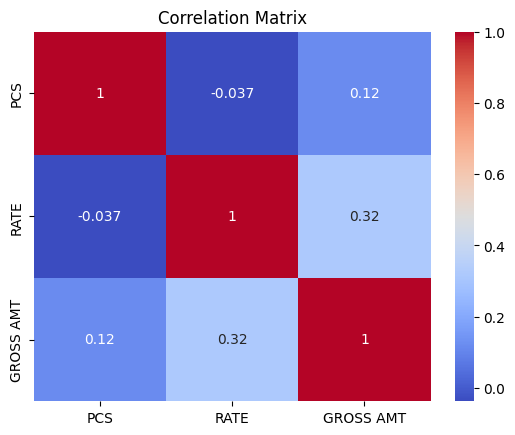

In [35]:
corr_matrix = df2[['PCS', 'RATE', 'GROSS AMT']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [36]:
grouped_summary =df2.groupby('CUSTOMER').agg({
    'PCS': 'sum',  # Total quantity sold per customer
    'GROSS AMT': 'sum',  # Total gross amount per customer
    'RATE': 'mean'  # Average rate per customer
}).reset_index()

grouped_summary

,CUSTOMER,PCS,GROSS AMT,RATE
0,AANCHOL,18.0,11452.0,636.250000
1,ABBI COLLECTION,69.0,56213.0,523.351594
2,ABDUL RAHMAN(SINGAPORE),96.0,47263.0,596.489479
3,ADDVEN SOLUTIONS PRIVATE LIMITED,46.0,70567.0,660.152609
4,AKASH KAUSHAL,10.0,24995.0,489.501000
...,...,...,...,...
120,VISHA DEVAN,471.0,401449.0,756.984102
121,VISHAL DARSHAN BOUTIQUE,453.0,424681.0,785.939459
122,YAMUNAH PUSPANATHAN,29.0,37471.0,975.444074
123,YASHWINI REDDY,43.0,46522.0,616.790698


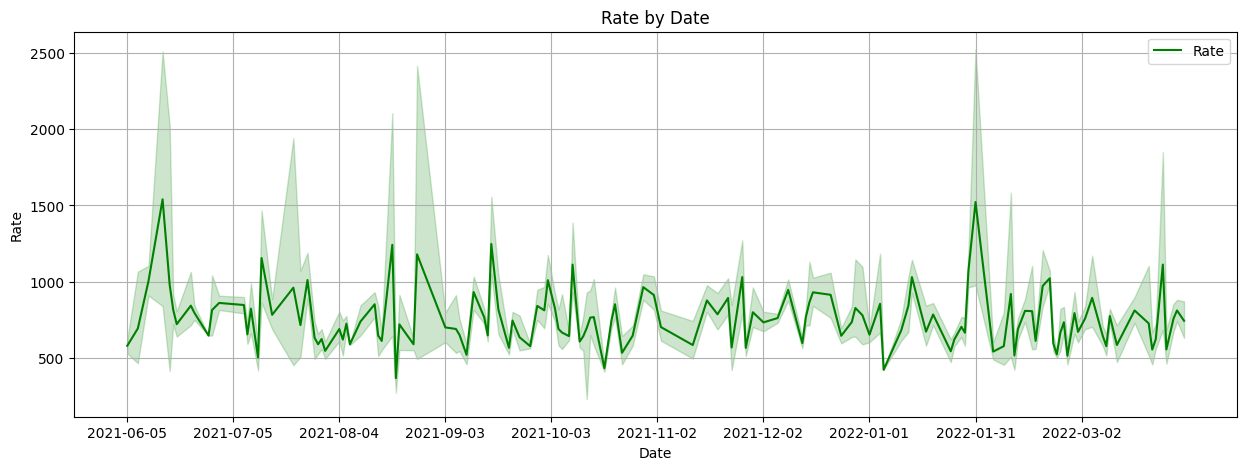

In [37]:
plt.figure(figsize=(15, 5))
sns.lineplot(x="DATE", y="RATE", data=df2, label="Rate", color="green")
plt.title("Rate by Date")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.xticks(pd.date_range(start=df2["DATE"].min(), end=df2["DATE"].max(), freq="30D"))
plt.grid(True)
plt.show()

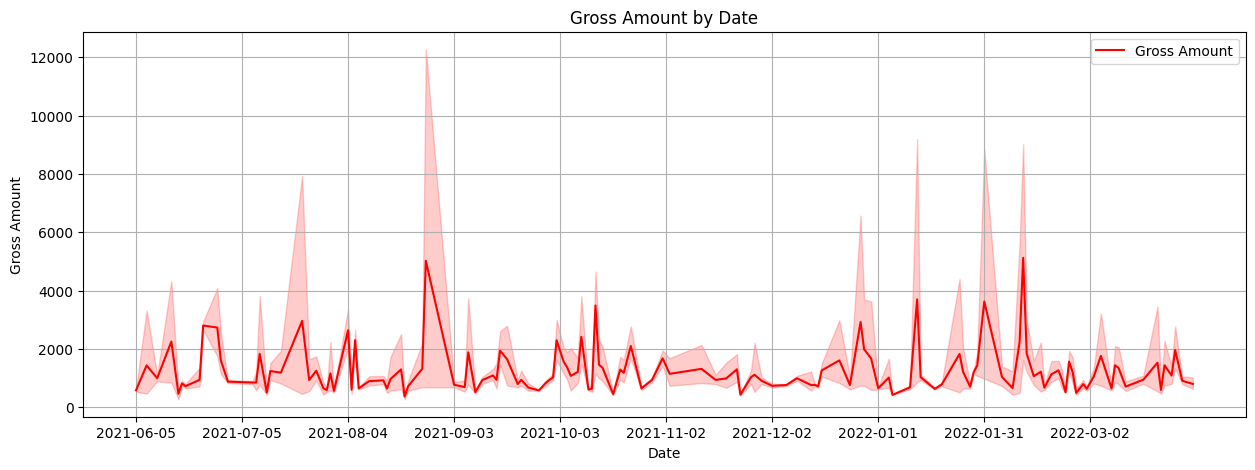

In [38]:
# Create Disribution of Gross Amount vs Date
plt.figure(figsize=(15, 5))
sns.lineplot(x="DATE", y="GROSS AMT", data=df2, label="Gross Amount", color="red")
plt.title("Gross Amount by Date")
plt.xlabel("Date")
plt.ylabel("Gross Amount")
plt.xticks(pd.date_range(start=df2["DATE"].min(), end=df2["DATE"].max(), freq="30D"))
plt.grid(True)
plt.show()

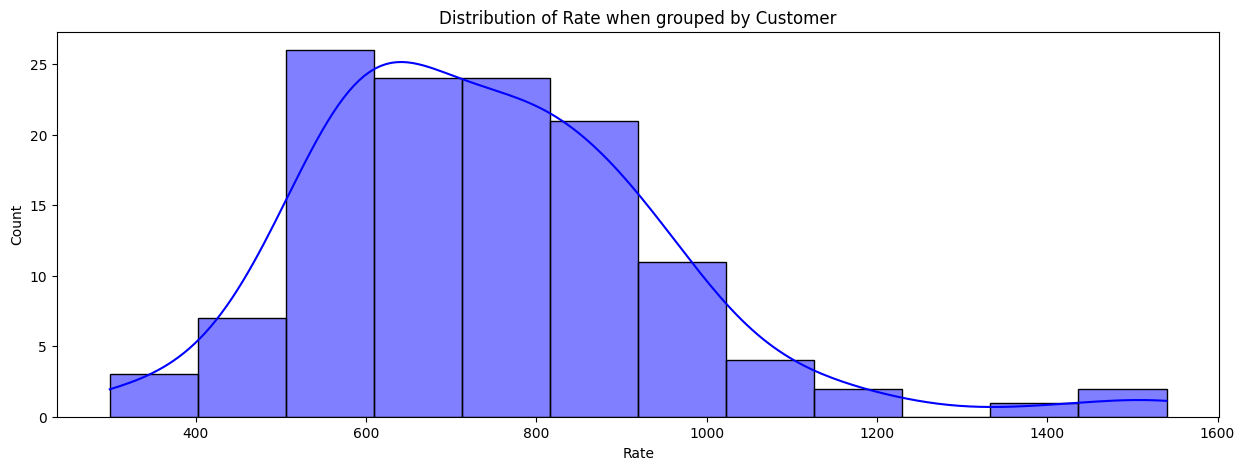

In [39]:
plt.figure(figsize=(15, 5))
sns.histplot(data=grouped_summary, x="RATE", kde=True, color="blue")
plt.title("Distribution of Rate when grouped by Customer")
plt.xlabel("Rate")
plt.ylabel("Count")
plt.show()

## Pushing Cleaned data to database

In [42]:
db = client["e-commerce_cleaned"]

In [41]:
# Create cleaned data collection 'Amazon-Sale-Report-Cleaned'
asr_data_dict = df.to_dict("records")
db.create_collection("Amazon-Sale-Report-Cleaned")
collection = db["Amazon-Sale-Report-Cleaned"]
collection.insert_many(asr_data_dict)

AutoReconnect: cluster0-shard-00-02.zf6aq.mongodb.net:27017: 

In [43]:
int_data_dict = df2.to_dict("records")
db.create_collection("International-Sale-Report-Cleaned")
collection = db["International-Sale-Report-Cleaned"]
collection.insert_many(int_data_dict)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e322a799-a681-4754-b873-85c47d774f17' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>